In [2]:
import sys
sys.path.append('../scripts_diy/')
from kf_diy import *

In [10]:
class FastSlam(Mcl):
    def __init__(self, envmap, init_pose, particle_num, landmark_num, \
                 motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}, \
                distance_dev_rate=0.14, direction_dev=0.05):
        super().__init__(envmap, init_pose, particle_num, motion_noise_stds, distance_dev_rate, direction_dev)

<IPython.core.display.Javascript object>


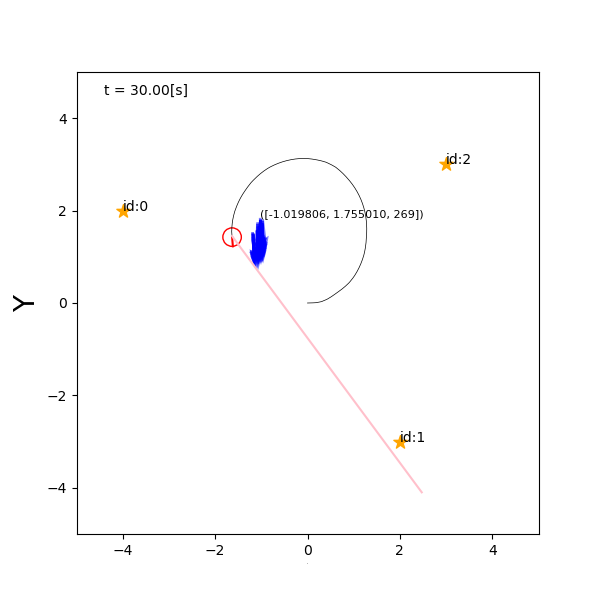

In [11]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval, debug=False)
    
    m = Map()
    for ln in [(-4, 2), (2, -3), (3, 3)]:
        m.append_landmark(Landmark(*ln))
    world.append(m)
    
    init_pose = np.array([0,0,0]).T
    pf = FastSlam(m, init_pose, 100, len(m.landmarks))
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)
    
    world.draw()
    
trial()